In [2]:
from RandomLoop import StateSpace
from IPython.display import HTML

In [29]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [20]:
m = StateSpace(2, 64, 0)

def beta_schedule():
    step = m.accepted + m.rejected
    if step <= 2_000_000:
        m.beta += 0.0056
    elif 2_000_000 <= step and step <= 4_000_000:
        m.beta += 0.00 
    else:
        m.beta -= 0.005
    return m.beta

observables = {
    'get_grid': m.get_grid,
    'beta_schedule': beta_schedule
}

m.step(num_steps=6_000_000, sample_rate=10_000, observables=observables)

  0%|          | 0/6000000 [00:00<?, ?it/s]

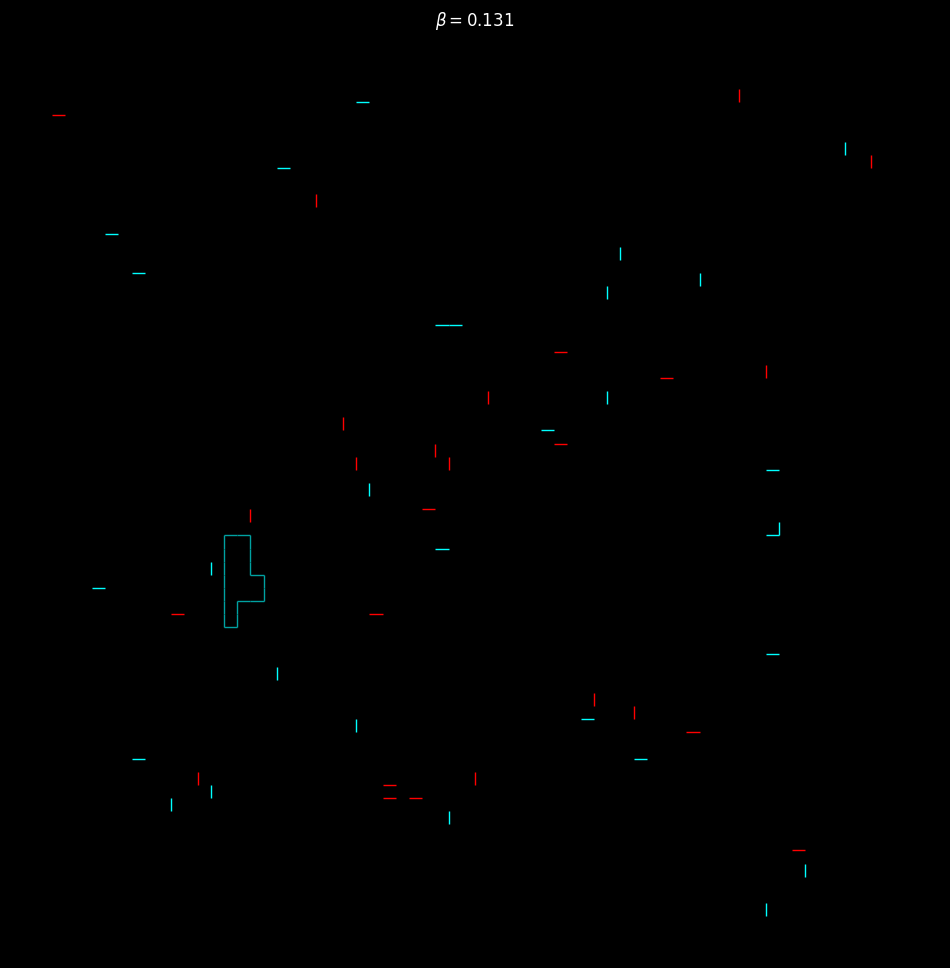

In [21]:
def title(i):
    return r'$\beta = $' + f"{m.data['beta_schedule'][i]:.3f}"

m.animate(title=title, file_name='XY_beta_var.mp4')


FloatSlider(value=1.0, description='Beta', max=5.0, min=0.1)

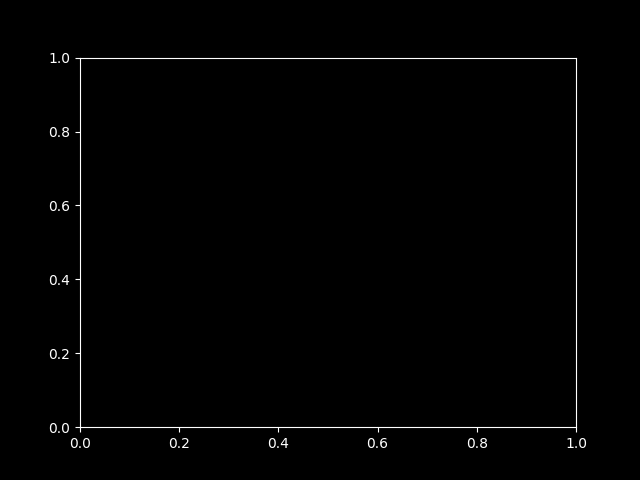

  0%|          | 0/1000 [00:00<?, ?it/s]

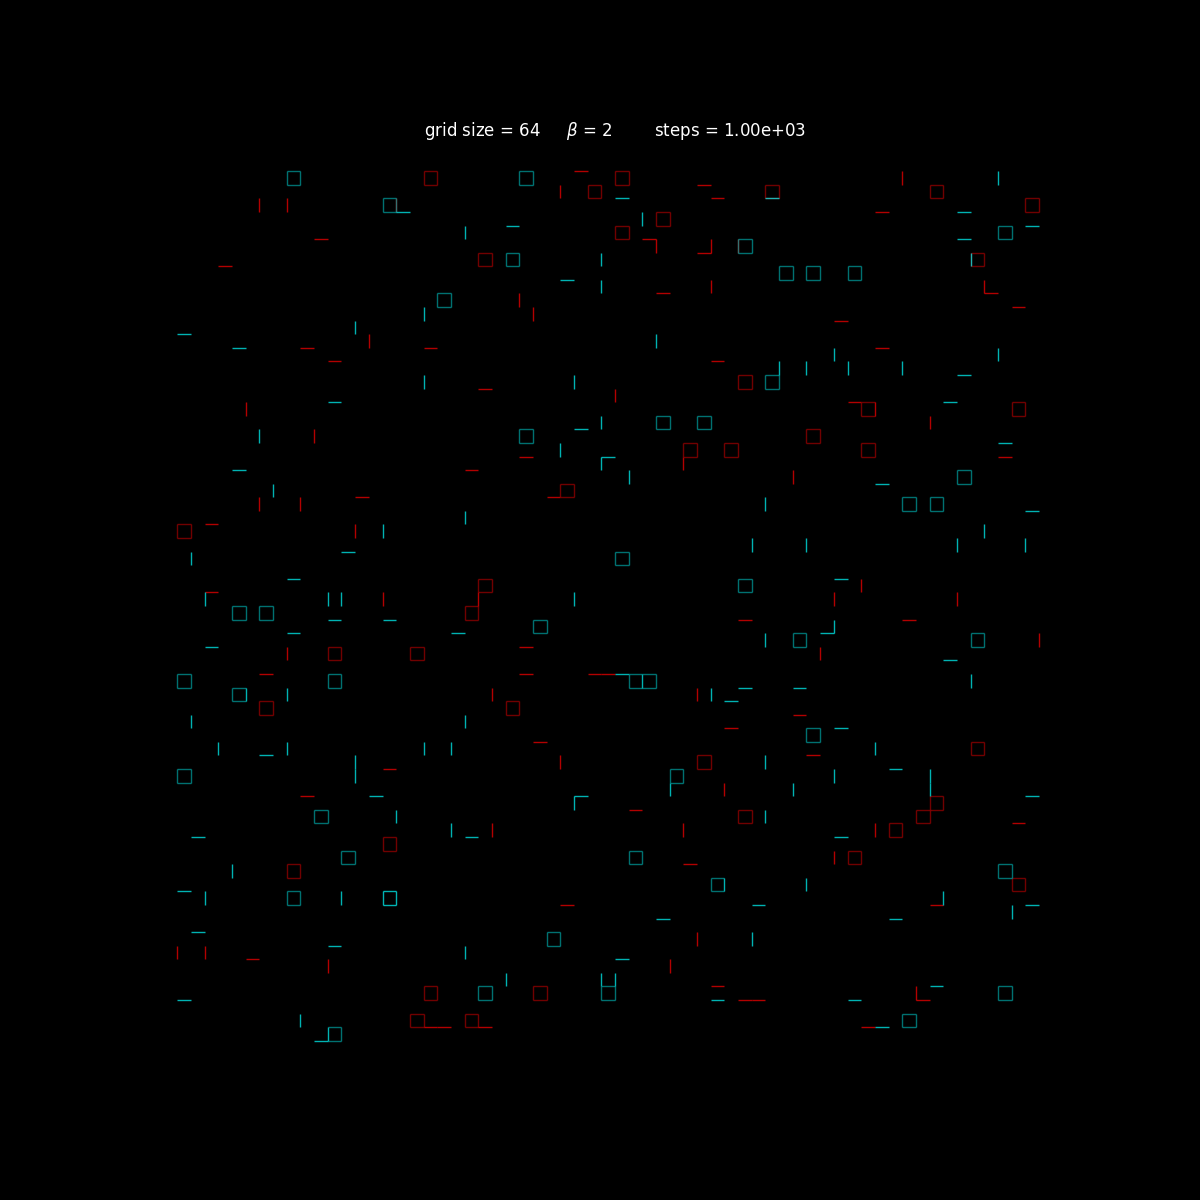

TypeError: cannot unpack non-iterable NoneType object

In [30]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display

class Simulation:
    def __init__(self, beta):
        self.beta = beta
        self.step_count = 0

    def step(self, steps=1):
        # Simulate the system for a number of steps
        self.step_count += steps

    def plot_overlap(self):
        # Create a plot that shows the current state of the system
        fig, ax = plt.subplots()
        x = np.linspace(0, 2 * np.pi, 100)
        y = np.sin(x * self.beta + self.step_count / 10.0)
        ax.plot(x, y)
        ax.set_title(f"Step {self.step_count}, Beta {self.beta}")
        plt.close(fig)  # Prevents duplicate display in Jupyter
        return fig, ax

# Create an instance of the Simulation class
m = StateSpace(2, 64, 2)

# Define the animate function
def animate(i):
    m.step(1000)  # Perform 1000 steps per frame
    fig, ax = m.plot_overlap()
    plt.close(fig)
    ax.clear()
    ax.plot(np.linspace(0, 2 * np.pi, 100), np.sin(np.linspace(0, 2 * np.pi, 100) * m.beta + m.step_count / 10.0))
    ax.set_title(f"Step {m.step_count}, Beta {m.beta}")

# Define the function to update the beta value
def update_beta(change):
    m.beta = change['new']

# Create the matplotlib figure and axis
fig, ax = plt.subplots()

# Create the animation
ani = FuncAnimation(fig, animate, frames=100, interval=500, repeat=False)

# Create an interactive widget for beta
beta_slider = widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Beta')
beta_slider.observe(update_beta, names='value')

# Display the interactive widget and the animation
display(beta_slider)
plt.show()
